In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn = pd.read_csv("customer_churn.csv")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn.shape

(7043, 21)

In [4]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


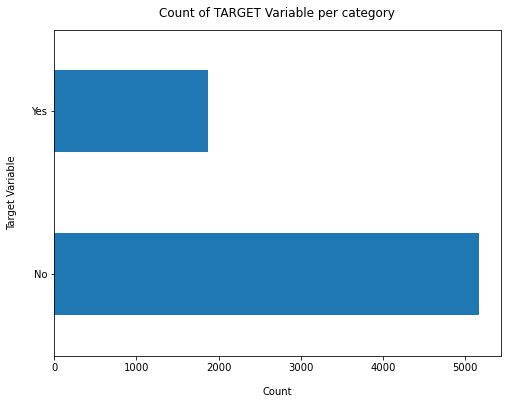

In [7]:
churn['Churn'].value_counts().plot(kind = 'barh', figsize = (8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [8]:
100*churn["Churn"].value_counts()/len(churn['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [9]:
len(churn['Churn'])

7043

In [10]:
churn["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

- Data is Highly Imbalanced ratio = 73:27
- So we analyse the data with other features while taking the target values separately to get some insights

In [11]:
# Concise Summary of the dataframe, as we have too mrny columns, we are using the verbose = True mode
churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


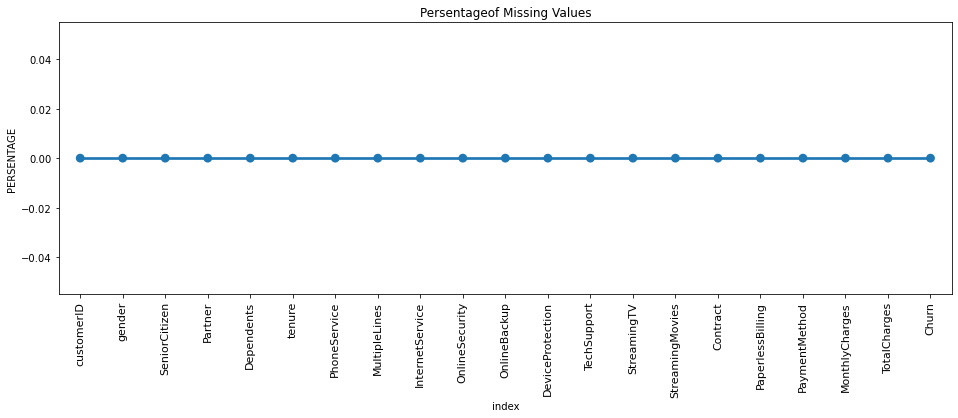

In [12]:
missing = pd.DataFrame((churn.isnull().sum())*100/churn.shape[0]).reset_index()
plt.figure(figsize = (16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize=11)
plt.title("Persentageof Missing Values")
plt.ylabel("PERSENTAGE")
plt.show()

### Missing Value - Initial Intution
- General Thumb rules
- - For feature with less Missing Values - cn use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- - For feature with very very high number of missing values- it is better to drop those columnsas they give very less insight on analysis
- - As there's no thumb rule on criteria do we delete the columns aith high number of missing values, but gennerally you cn delete the columns. if you have more than 30-40% of missing values. But again there,s a catch here, for ex, Is_Car & Car_Type, People having no cars, will obviously have Cat_Type as NaN(Null). but that doesn't make this column useless, so decision has to be takes wisely.

## Data Cleaning

In [13]:
churn= churn.copy()

In [14]:
churn.TotalCharges = pd.to_numeric(churn.TotalCharges,errors='coerce')
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
churn.loc[churn['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
churn.dropna(how = 'any',inplace=True)

- Divide Customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 years, tenure group of 13-24; so on...

In [17]:
print(churn['tenure'].max())

72


In [18]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
churn['tenure_group'] = pd.cut(churn.tenure, range(1,80,12), right=False, labels=labels)

In [19]:
churn['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

- Remove columns not required processing

In [20]:
churn.drop(columns= ['customerID','tenure'],axis = 1, inplace= True)
churn.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration
- Plot distribution of individual predictors

### Univariate Analysis

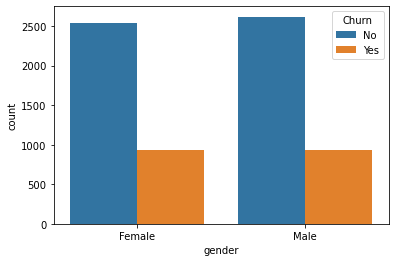

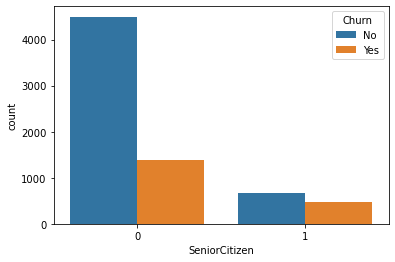

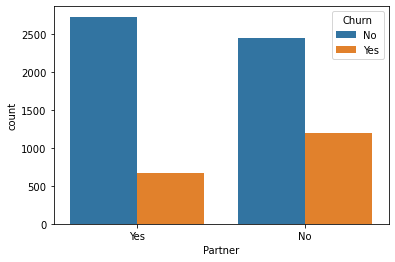

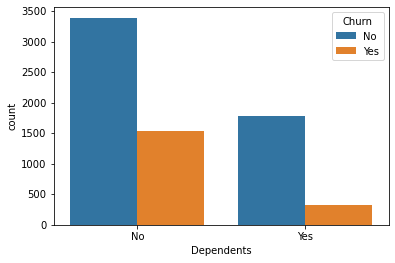

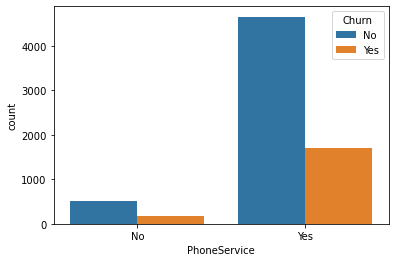

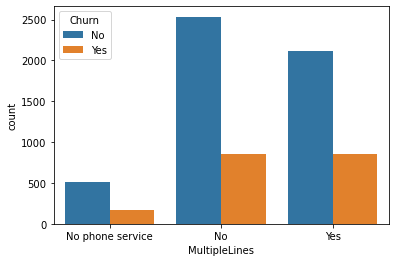

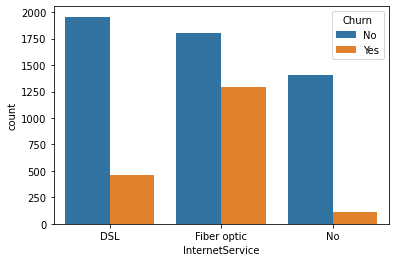

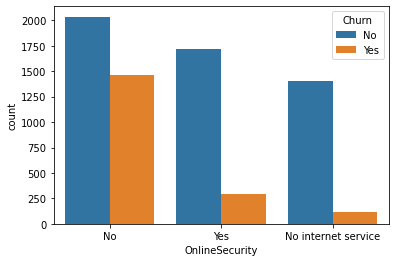

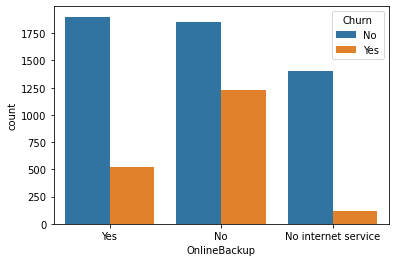

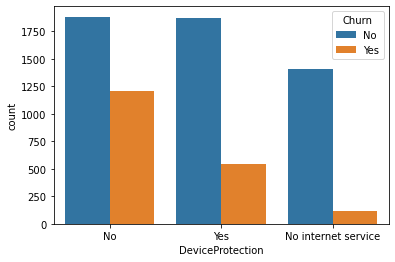

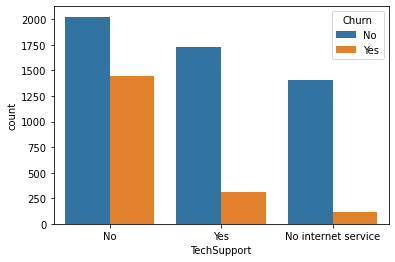

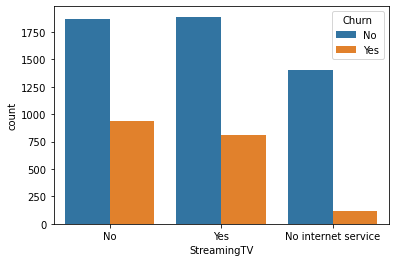

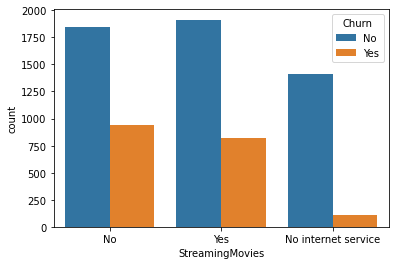

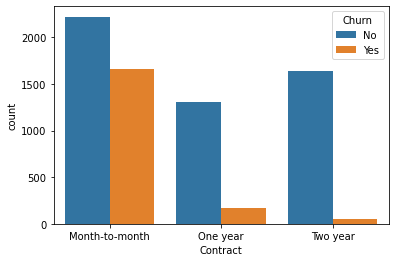

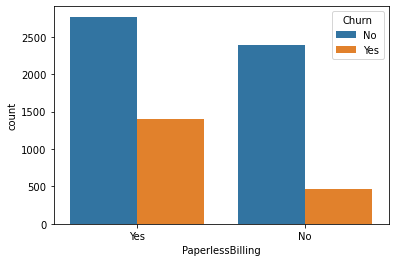

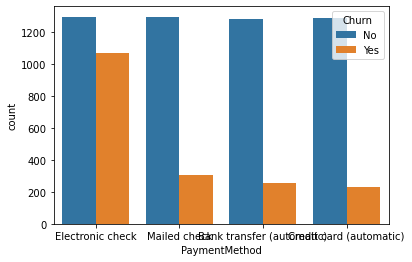

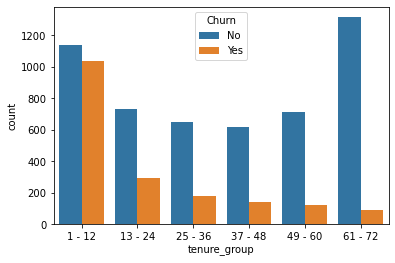

In [21]:
for i, predictor in enumerate(churn.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=churn, x= predictor , hue='Churn')

- Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1, No=0

In [22]:
churn['Churn'] = np.where(churn.Churn == 'Yes',1,0)

In [23]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


- Convert all the categorical variable into dummy variable

In [24]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [25]:
for col in churn.columns:
    print(col,':',len(churn[col].unique()), 'labels')

gender : 2 labels
SeniorCitizen : 2 labels
Partner : 2 labels
Dependents : 2 labels
PhoneService : 2 labels
MultipleLines : 3 labels
InternetService : 3 labels
OnlineSecurity : 3 labels
OnlineBackup : 3 labels
DeviceProtection : 3 labels
TechSupport : 3 labels
StreamingTV : 3 labels
StreamingMovies : 3 labels
Contract : 3 labels
PaperlessBilling : 2 labels
PaymentMethod : 4 labels
MonthlyCharges : 1584 labels
TotalCharges : 6530 labels
Churn : 2 labels
tenure_group : 6 labels


In [26]:
churn_data = pd.get_dummies(churn,drop_first=True)

In [27]:
churn_data.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


- Relationship between Monthly charges and Total charges

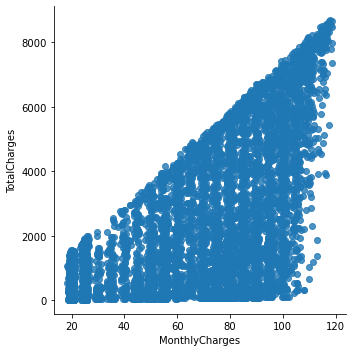

In [28]:
sns.lmplot(data = churn_data, x= 'MonthlyCharges',y = 'TotalCharges', fit_reg=False);

- Total charges increases as monthly charges increases

- churn by monthly charges and total charges

Text(0.5, 1.0, ' Monthly charges by churn')

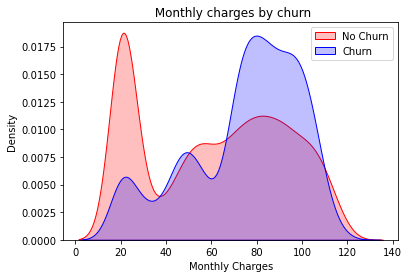

In [29]:
Mth = sns.kdeplot(churn_data.MonthlyCharges[(churn_data['Churn']==0) ],color = 'Red', shade = True)
Mth = sns.kdeplot(churn_data.MonthlyCharges[(churn_data['Churn']==1) ],ax=Mth, color = 'Blue', shade = True)
Mth.legend(['No Churn','Churn'],loc= 'upper right')
Mth.set_ylabel("Density")
Mth.set_xlabel('Monthly Charges')
Mth.set_title(" Monthly charges by churn")

- Churn is high when Monthly charges is high

Text(0.5, 1.0, ' Total Charges by churn')

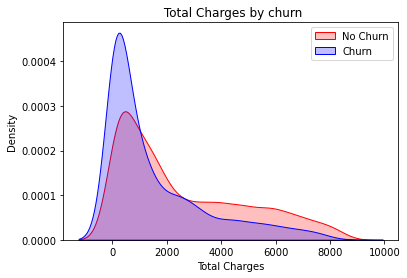

In [30]:
Tot = sns.kdeplot(churn_data.TotalCharges[(churn_data['Churn']==0) ],color = 'Red', shade = True)
Tot = sns.kdeplot(churn_data.TotalCharges[(churn_data['Churn']==1) ],ax=Tot, color = 'Blue', shade = True)
Tot.legend(['No Churn','Churn'],loc= 'upper right')
Tot.set_ylabel("Density")
Tot.set_xlabel('Total Charges')
Tot.set_title(" Total Charges by churn")

- Higher churn at lower Total Charges
- However if we combine the 3 parameter i.e; Tenure, MonthlyCharges, & TotalCharges then the picturesis bit clear 
- :- Higher Monthly charges at lower tenure resultes into lower Total charges. Hence, all these 3 factors ciz Higher Monthly charge,Lower tenure and Lower Tenure Charges are linked to High linked

#### Build a corelation of all predictors whit 'Churn'

<AxesSubplot:>

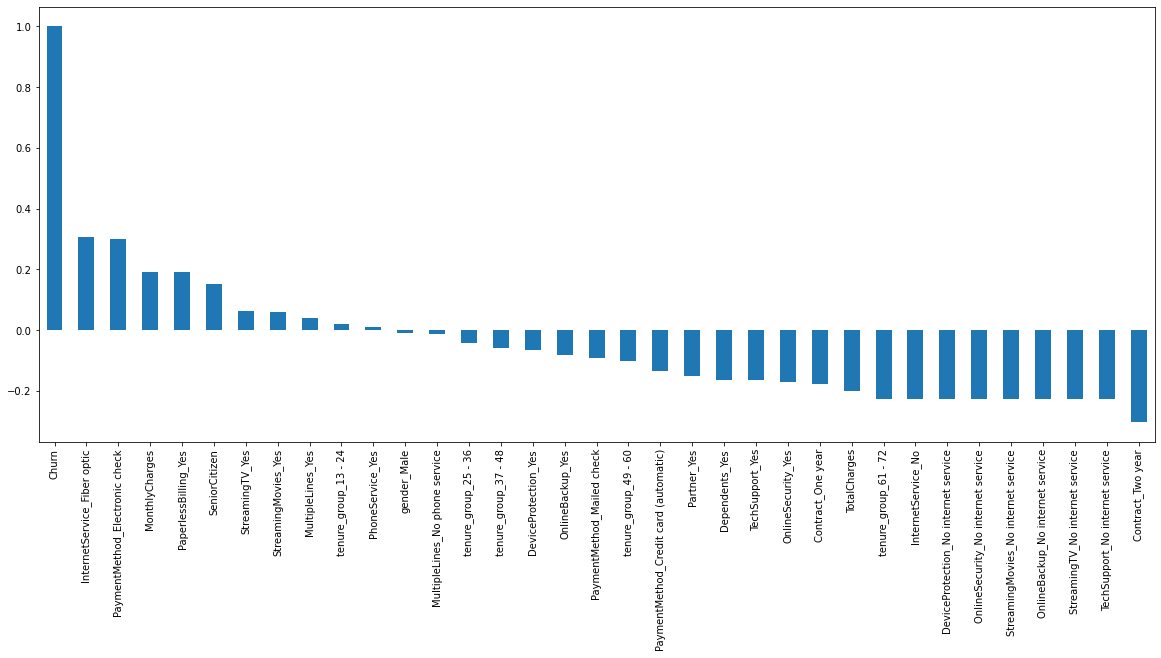

In [31]:
plt.figure(figsize=(20,8))
churn_data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

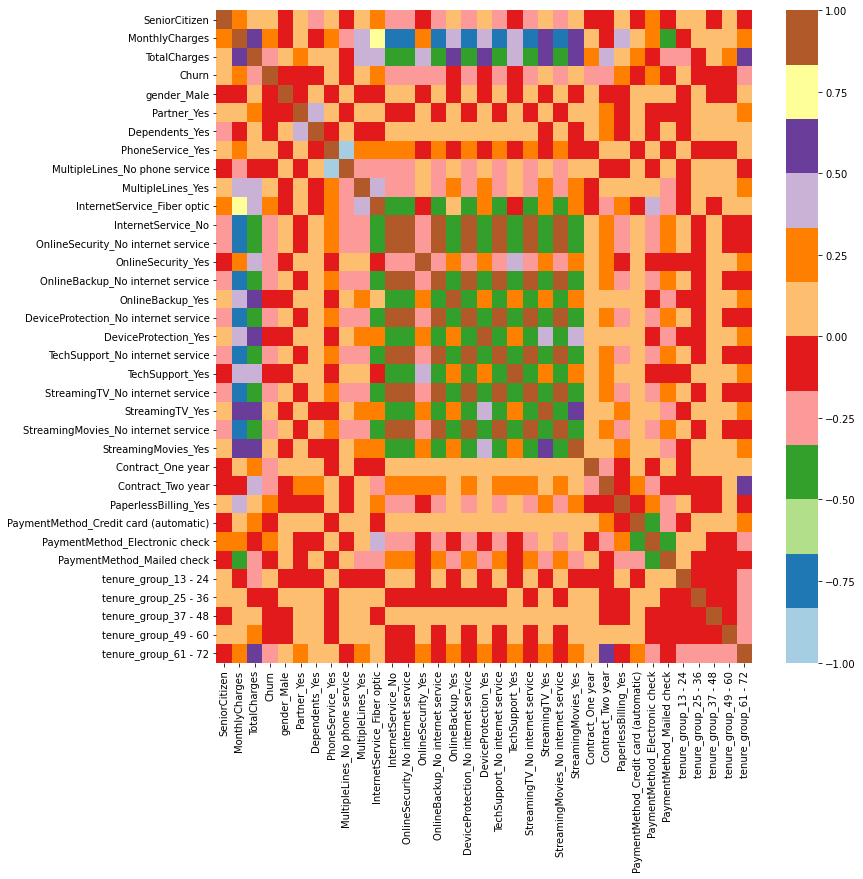

In [32]:
plt.figure(figsize = (12,12))
sns.heatmap(churn_data.corr(),cmap='Paired')

#### Bivariate Analysis

In [33]:
New_churn_0 = churn.loc[churn['Churn']==0]
New_churn_1 = churn.loc[churn['Churn']==1]

In [34]:
def uniplot(churn,col,title,hue=None):
    
    sns.set_style("whitegrid")
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(churn[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = churn, x= col, order=churn[col].value_counts().index,hue = hue,palette= 'bright')
    plt.show()

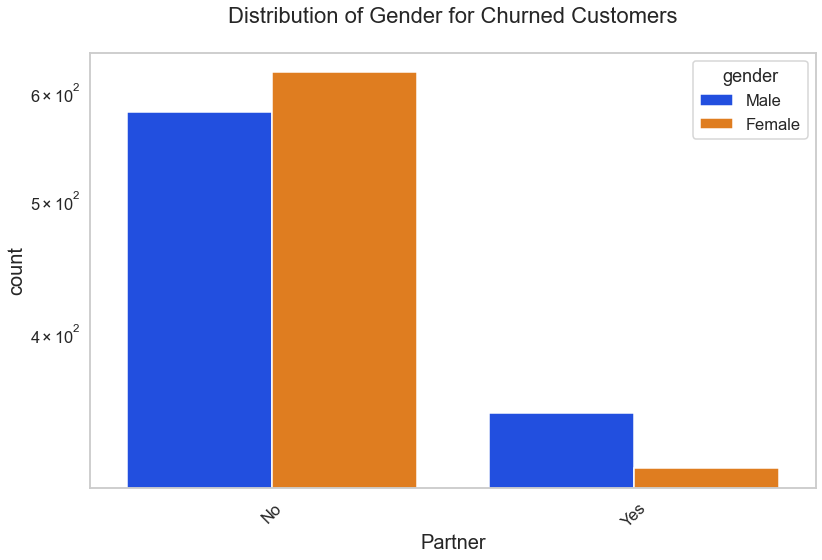

In [35]:
uniplot(New_churn_1,col= 'Partner',title = 'Distribution of Gender for Churned Customers',hue='gender')

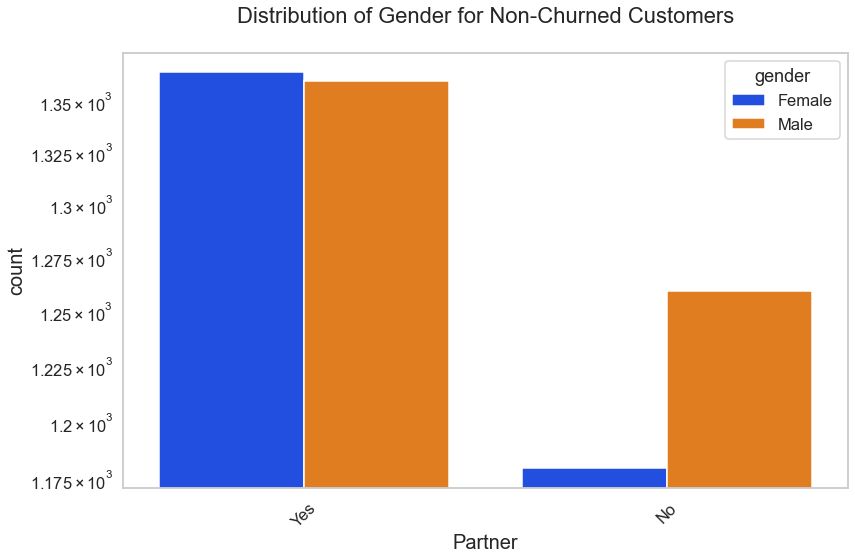

In [36]:
uniplot(New_churn_0,col= 'Partner',title = 'Distribution of Gender for Non-Churned Customers',hue='gender')

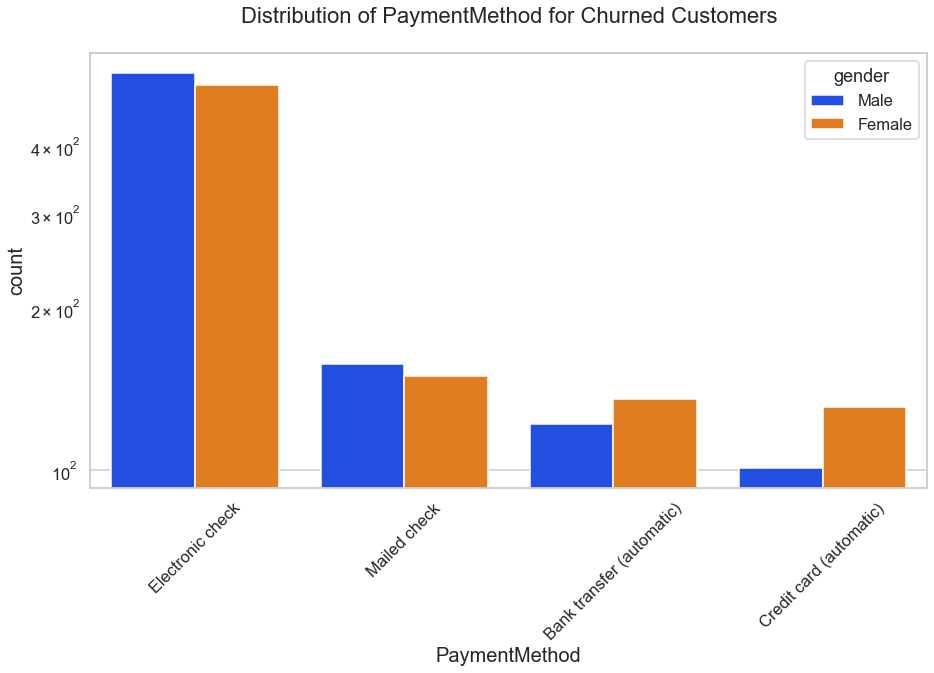

In [37]:
uniplot(New_churn_1,col= 'PaymentMethod',title = 'Distribution of PaymentMethod for Churned Customers',hue='gender')

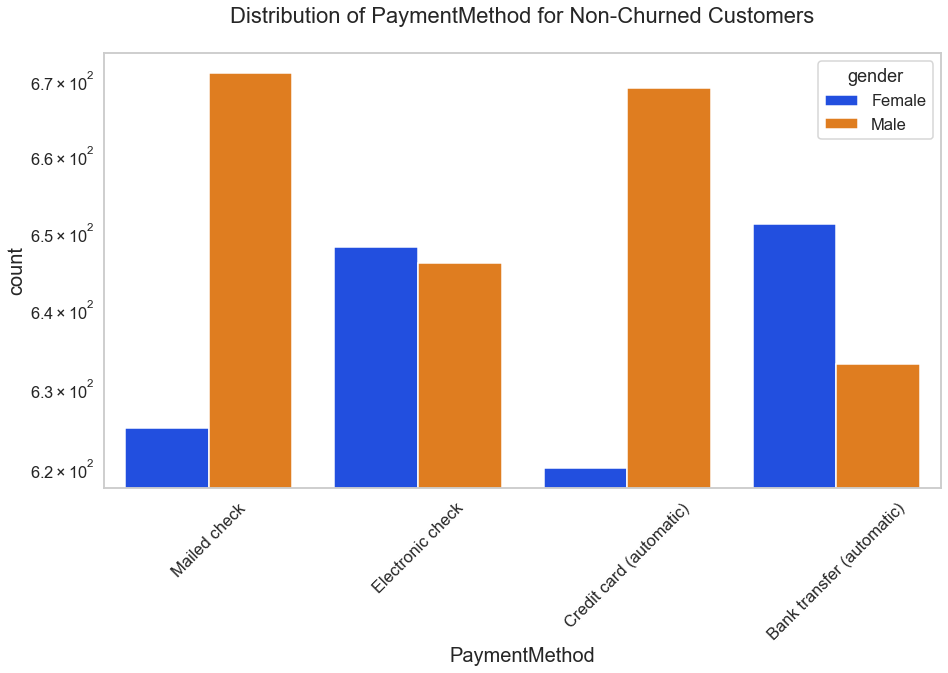

In [38]:
uniplot(New_churn_0,col= 'PaymentMethod',title = 'Distribution of PaymentMethod for Non-Churned Customers',hue='gender')

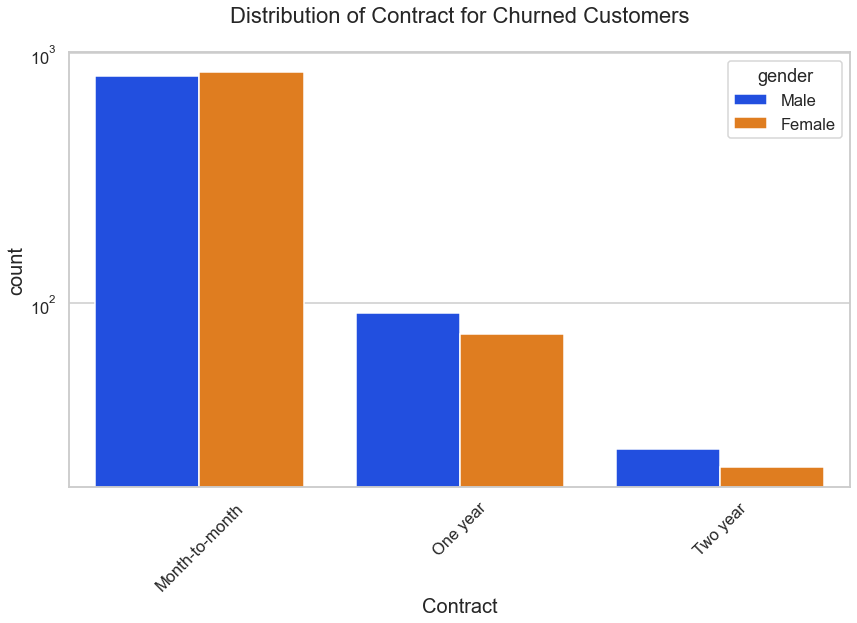

In [39]:
uniplot(New_churn_1,col= 'Contract',title = 'Distribution of Contract for Churned Customers',hue='gender')

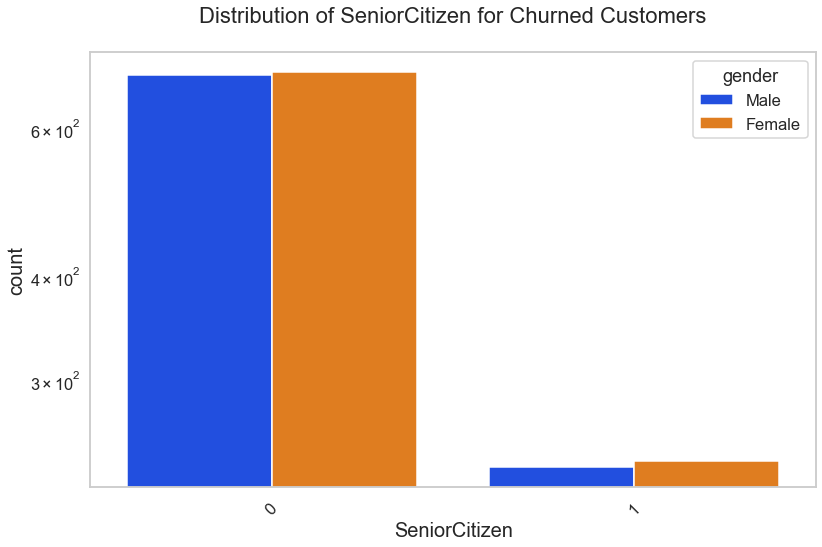

In [40]:
uniplot(New_churn_1,col= 'SeniorCitizen',title = 'Distribution of SeniorCitizen for Churned Customers',hue='gender')

### Conclusion
- These are some of the quick insights from this exercise
- -  Electronic check medium are the highest churners
- - No online security, no Tech support category are higher churners
- - Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers
- - Non senior Citizen are high churners

In [41]:
churn_data.to_csv('tel_churn.csv')

In [42]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [43]:
df = pd.read_csv("tel_churn.csv")

In [44]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,1,0,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,2,0,53.85,108.15,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [45]:
df = df.drop('Unnamed: 0',axis=1)

In [46]:
df.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


- Creating x and y Variable

In [47]:
x = df.drop('Churn',axis=1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [48]:
y = df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [50]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [51]:
model = DecisionTreeClassifier()

In [52]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
pred = model.predict(x_test)

In [54]:
pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
model.score(x_test,pred)

1.0

In [56]:
grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [6,10,15,20]
}

In [57]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), param_grid=grid, scoring='accuracy',n_jobs=-1)

In [58]:
grid_search_cv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [6, 10, 15, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [59]:
grid_search_cv.best_score_

0.7848888888888889

In [60]:
grid_search_cv.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'}

In [61]:
y_grid_pred = grid_search_cv.predict(x_test)

In [62]:
y_grid_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
print(classification_report(y_test,y_grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1046
           1       0.61      0.46      0.52       361

    accuracy                           0.79      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.79      0.78      1407



In [64]:
rdm_search_cv = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=grid, scoring='accuracy',n_jobs=-1)

In [65]:
rdm_search_cv.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [6, 10, 15, 20],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [66]:
rdm_search_cv.best_score_

0.7857777777777778

In [67]:
rdm_search_cv.best_params_

{'splitter': 'random', 'max_depth': 6, 'criterion': 'entropy'}

In [68]:
y_pred = rdm_search_cv.predict(x_test)

In [69]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [70]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1046
           1       0.54      0.60      0.57       361

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.70      1407
weighted avg       0.78      0.77      0.77      1407



In [71]:
print(confusion_matrix(y_test,y_pred))

[[860 186]
 [143 218]]


#### Handling imbalnced data

In [72]:
sm = SMOTEENN()

In [73]:
x_resampled, y_resampled = sm.fit_resample(x,y)

In [74]:
xr_train,xr_test,yr_train,yr_test = train_test_split(x_resampled,y_resampled,test_size=0.2)

In [75]:
rdm_search_cv.fit(xr_train,yr_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [6, 10, 15, 20],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [76]:
rdm_search_cv.best_score_

0.9349159951733081

In [77]:
rdm_search_cv.best_params_

{'splitter': 'best', 'max_depth': 10, 'criterion': 'entropy'}

In [78]:
y_pred_new = rdm_search_cv.predict(xr_test)

In [79]:
y_pred_new

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [80]:
print(classification_report(yr_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       518
           1       0.94      0.95      0.94       631

    accuracy                           0.94      1149
   macro avg       0.94      0.94      0.94      1149
weighted avg       0.94      0.94      0.94      1149



In [81]:
print(confusion_matrix(yr_test,y_pred_new))

[[479  39]
 [ 32 599]]


In [82]:
grid_search_cv.fit(xr_train,yr_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [6, 10, 15, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [83]:
yr_grid_pred = grid_search_cv.predict(xr_test)

In [84]:
yr_grid_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [85]:
print(classification_report(yr_test,yr_grid_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       518
           1       0.94      0.94      0.94       631

    accuracy                           0.93      1149
   macro avg       0.93      0.93      0.93      1149
weighted avg       0.93      0.93      0.93      1149



In [86]:
print(confusion_matrix(yr_test,yr_grid_pred))

[[479  39]
 [ 38 593]]


### Random Forest classfier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
grid1 = {
    'n_estimators' : [10,50,70,100],
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth' : [6,10,15,20],
    'min_samples_split' : [2,4,6,10],
    'max_features' : ["sqrt","log2"]
}

In [89]:
grid1_search_cv = GridSearchCV(RandomForestClassifier(),param_grid= grid1, scoring="accuracy", n_jobs= -1)

In [90]:
grid1_search_cv.fit(xr_train,yr_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [6, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 10],
                         'n_estimators': [10, 50, 70, 100]},
             scoring='accuracy')

In [91]:
ygr1_pred = grid1_search_cv.predict(xr_test)

In [92]:
grid1_search_cv.best_score_

0.9536367321683843

In [93]:
grid1_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 70}

In [94]:
ygr1_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [95]:
print(classification_report(yr_test,ygr1_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       518
           1       0.95      0.97      0.96       631

    accuracy                           0.95      1149
   macro avg       0.95      0.95      0.95      1149
weighted avg       0.95      0.95      0.95      1149



In [96]:
print(confusion_matrix(yr_test,ygr1_pred))

[[483  35]
 [ 20 611]]


In [97]:
rdm1_search_cv = RandomizedSearchCV(RandomForestClassifier(),param_distributions = grid1, scoring="accuracy", n_jobs= -1)

In [98]:
rdm1_search_cv.fit(xr_train,yr_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [6, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [10, 50, 70, 100]},
                   scoring='accuracy')

In [99]:
rdm1_search_cv.best_score_

0.9525483558191745

In [100]:
rdm1_search_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 15,
 'criterion': 'gini'}

In [101]:
yrdm_pred = rdm1_search_cv.predict(xr_test)

In [102]:
yrdm_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [103]:
print(classification_report(yr_test,yrdm_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       518
           1       0.95      0.97      0.96       631

    accuracy                           0.95      1149
   macro avg       0.96      0.95      0.95      1149
weighted avg       0.96      0.95      0.95      1149



In [104]:
print(confusion_matrix(yr_test,ygr1_pred))

[[483  35]
 [ 20 611]]


In [131]:
import pickle

In [132]:
filename = 'model.Ank'

In [133]:
pickle.dump(rdm1_search_cv, open(filename, 'wb'))

In [134]:
load_model = pickle.load(open(filename, 'rb'))

In [135]:
load_model.score(xr_test,yr_test)

0.9547432550043516